# 선형 회귀

## 1. Python 패키지 Import

`numpy`와 `pyplot`을 사용하기 위해 패키지를 import 한다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential # keras의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # keras의 Dense()를 임포트
from tensorflow.keras import optimizers # keras의 옵티마이저를 임포트

2023-06-19 15:40:48.457682: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-19 15:40:48.543675: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 15:40:48.901373: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 15:40:48.903340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 15:40:50.341923: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## 2. 샘플 데이터 생성

선형 회귀 분석을 위해 선형성을 갖는 임의의 데이터를 생성하고자 한다.

numpy를 이용해 0 ~ 10 값 128개를 랜덤으로 생성하고 아래 1차함수 식에 따라 y값 100개를 만든다.

$$
y = 1.5x - 180
$$

오차를 만들기 위해서 y값에 랜덤한 값을 더한다.

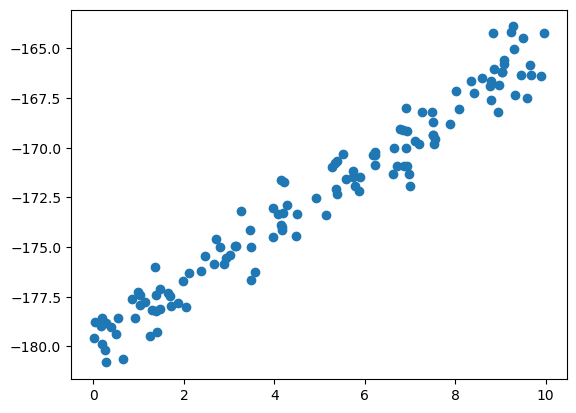

In [2]:
rng = np.random.RandomState(1)

# 랜덤으로 0~10 값 128개를 생성
x = 10 * rng.rand(128)

# 일차함수 "y = 1.5x - 180" 적용
y = 1.5 * x - 180

# y값에 랜덤한 오차 값 만큼 더함
y = y + rng.randn(128)

# x, y 그래프 출력
plt.scatter(x, y)

# Keras를 이용한 선형 회귀 모델 생성 및 학습

In [3]:
# Sequential()로 model이라는 이름의 모델 객체을 만듭니다.
model = Sequential()

# 입력이 1차원, 출력도 1차원인 FC 레이어
# 선형 회귀를 사용하기 때문에 활성함수를 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# 모델 모양 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


모델의 모양을 만들었다면, 구체적인 옵션을 지정해줍니다.

In [4]:
# optimer로는 adam, lr=0.5
adam = optimizers.Adam(learning_rate=0.5)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=adam, loss='mse', metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 500번 시도합니다.
model.fit(x, y, batch_size=32, epochs=500, shuffle=True)

Epoch 1/500
4/4 [==============================] - 0s 5ms/step - loss: 27686.1680 - mse: 27686.1680
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 24054.0078 - mse: 24054.0078
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 20759.2227 - mse: 20759.2227
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 17885.5508 - mse: 17885.5508
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 15469.8457 - mse: 15469.8457
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 13374.6738 - mse: 13374.6738
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 11632.9746 - mse: 11632.9746
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 10286.6045 - mse: 10286.6045
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 9212.9795 - mse: 9212.9795
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 8404.2100 - mse: 8404.2100
Epo

# 결과 확인

우리 예시로 사용한 1차 함수는 아래와 같습니다.

$$
y = 1.5x - 180
$$

따라서 `[0, 1, 2, 3]`에 대한 결과는 `[-180, -175.5, -177, -175.5]`이 나와야 합니다. 모델이 올바르게 추론했는지 확인해봅시다.

In [5]:
print(model.predict([0, 1, 2, 3]))

1/1 [==============================] - 0s 147ms/step
[[-179.76779]
 [-178.29454]
 [-176.82129]
 [-175.34805]]


# 모델 가중치 값 확인

`1.5`, `-180`을 확인 할 수 있음

In [6]:
model.layers[0].get_weights()

[array([[1.473248]], dtype=float32), array([-179.76779], dtype=float32)]

# 보험료 분석을 선형회귀 대신 신경망으로 예측하기

이번 예제에서는 주어진 보험료 데이터를 이용하여 회귀 모델을 학습시켜 보험료를 예측하는 대신 신경망을 이용하여 보험료를 예측하는 예제를 해보려고 합니다.

## 사용되는 라이브러리

numpy: 행렬을 다루는 라이브러리 입니다. pandas: csv 형식의 데이터를 읽고 조작하기 위해 사용되는 라이브러리 입니다. seaborn: 데이터를 시각화하는데 필요한 라이브러리 입니다. matplotlib를 이용하지 않고도 내장된 기능으로 그래프를 그릴 수 있습니다. matplotlib: 데이터를 그래프로 표현하는데 사용하는 라이브러리 입니다.

데이터를 pandas로 읽어서 표 형태로 확인해봅시다.

In [7]:
insurance_data = pd.read_csv("../BasicML/regression/data/insurance.csv")
display(insurance_data)

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# 상관관계 분석하기

`pairplot`를 이용하여 상관관계를 분석하면 numeric데이터 중에서는 age가 가장 보험료와 상관관계가 뚜렷히 나타나고 양의 상관관계를 가지고 있음을 알 수 있습니다.

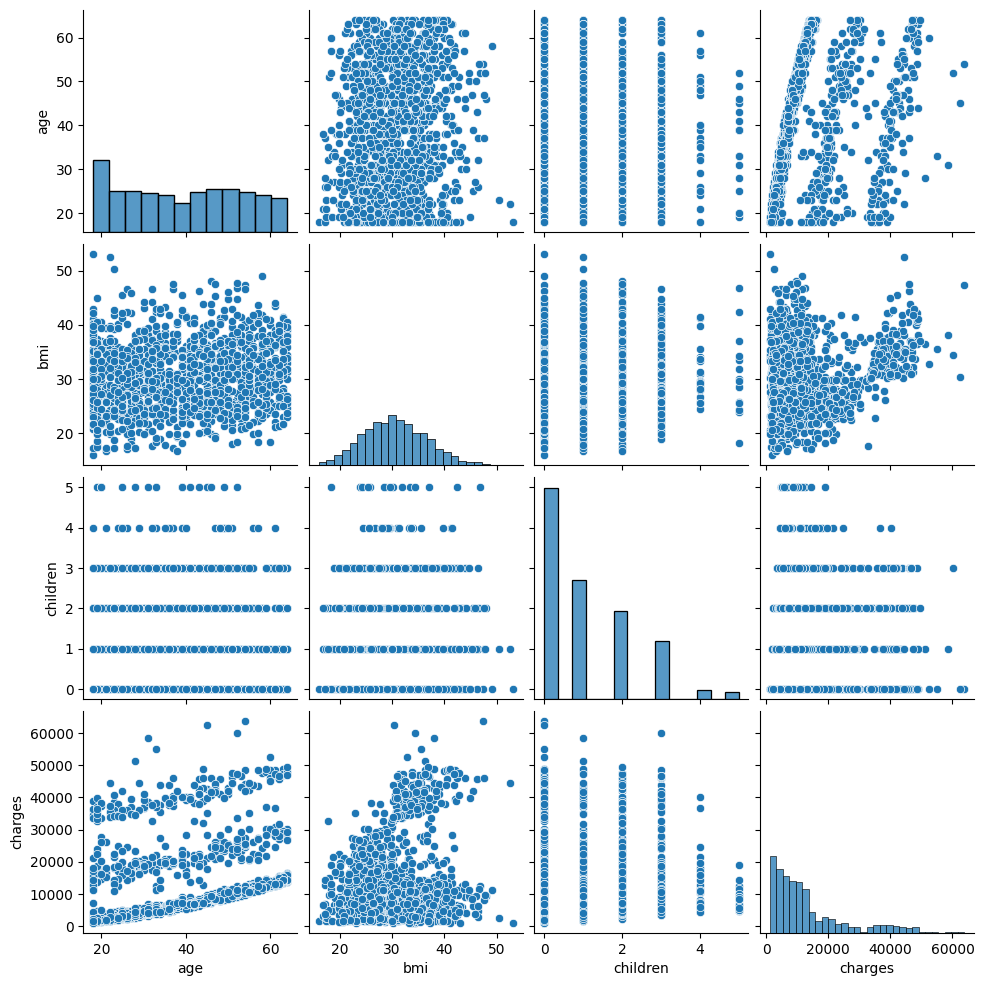

In [8]:
sns.pairplot(insurance_data)


숫자가 아닌 데이터 타입은 숫자로 표시될 수 있도록 LabelEncoder로 바꿔줍니다.

In [9]:
non_numeric_columns = insurance_data.select_dtypes(exclude=np.number).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in non_numeric_columns:
    insurance_data[i] = label_encoder.fit_transform(insurance_data[i])
print(insurance_data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


데이터 속성간에 상관관계 분석을 통해서 흡연 여부와 보험료의 상관관계가 0.787251로 가장 높음을 알 수 있습니다. 따라서 보험료 추정에 가장 효과적으로 관여하는 변수는 흡연 여부 입니다.

In [10]:
### Correlation 구하기
insurance_data.corr()

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000

## heatmap으로 표시하기

heatmap은 상관관계를 온도에 따른 색상차로 표현한 것 입니다.

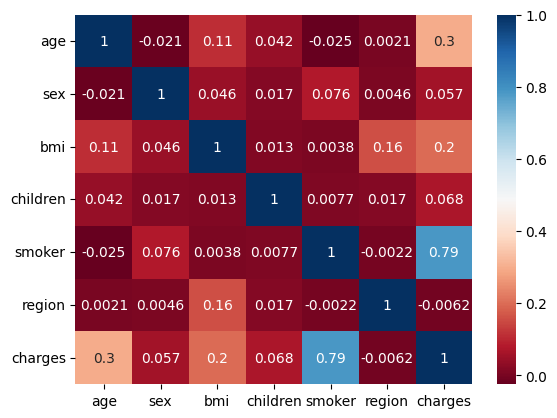

In [11]:
plt.figure()
sns.heatmap(insurance_data.corr(), annot = True, cmap="RdBu")
plt.show()

데이터를 normalization 해줍니다.

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
print(insurance_data.columns)
num_vars = ['age', 'bmi', 'charges']
insurance_data[num_vars] = min_max_scaler.fit_transform(insurance_data[num_vars])
print(insurance_data)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
           age  sex       bmi  children  smoker  region   charges
0     0.021739    0  0.321227         0       1       3  0.251611
1     0.000000    1  0.479150         1       0       2  0.009636
2     0.217391    1  0.458434         3       0       2  0.053115
3     0.326087    1  0.181464         0       0       1  0.333010
4     0.304348    1  0.347592         0       0       1  0.043816
...        ...  ...       ...       ...     ...     ...       ...
1333  0.695652    1  0.403820         3       0       1  0.151299
1334  0.000000    0  0.429379         0       0       0  0.017305
1335  0.000000    0  0.562012         0       0       2  0.008108
1336  0.065217    0  0.264730         0       0       3  0.014144
1337  0.934783    0  0.352704         0       1       1  0.447249

[1338 rows x 7 columns]


pandas가 다루는 데이터 타입에서 numpy가 다루는 행렬로 변환해줍니다.

In [13]:
x_input_data = insurance_data.to_numpy(dtype=np.float32)[:1000, :-1]
y_answer_data = insurance_data.to_numpy(dtype=np.float32)[:1000, -1]
print(x_input_data[:5])
print(y_answer_data[:5])

[[0.02173913 0.         0.3212268  0.         1.         3.        ]
 [0.         1.         0.47914985 1.         0.         2.        ]
 [0.2173913  1.         0.45843422 3.         0.         2.        ]
 [0.32608697 1.         0.18146354 0.         0.         1.        ]
 [0.3043478  1.         0.34759215 0.         0.         1.        ]]
[0.25161076 0.00963595 0.05311516 0.33301002 0.04381556]


이번에는 sklearn의 LinearRegression 모델이 아닌 신경망 모델을 이용하여 보험료를 예측해보도록 하겠습니다.

In [14]:
# Sequential()로 model이라는 이름의 모델 객체을 만듭니다.
insurance_model = Sequential()

# 입력이 1차원 출력은 6차원인 FC 레이어
# 선형 회귀를 사용하기 때문에 활성함수를 'linear'
insurance_model.add(Dense(1, input_dim=6, activation='linear'))

# optimer로는 adam, lr=0.01
adam = optimizers.Adam(learning_rate=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
insurance_model.compile(optimizer=adam, loss='mse', metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 100번 시도합니다.
insurance_model.fit(x_input_data, y_answer_data, batch_size=32, epochs=100, shuffle=True)

Epoch 1/100


32/32 [==============================] - 1s 2ms/step - loss: 0.5196 - mse: 0.5196
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1828 - mse: 0.1828
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0674 - mse: 0.0674
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0294 - mse: 0.0294
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0159 - mse: 0.0159
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0113 - mse: 0.0113
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0098 - mse: 0.0098
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0092 - mse: 0.0092
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - los

11/11 [==============================] - 0s 2ms/step


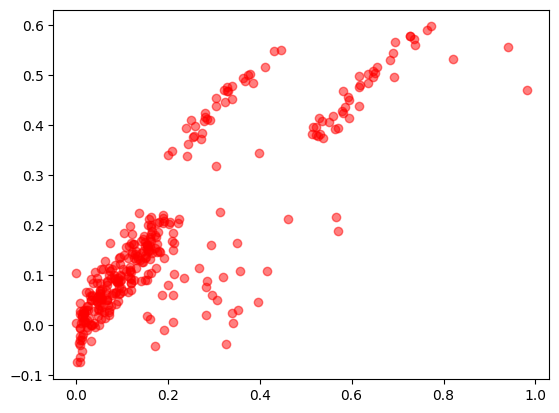

In [15]:
x_test = insurance_data.to_numpy(dtype=np.float32)[1000:, :-1]
y_test = insurance_data.to_numpy(dtype=np.float32)[1000:, -1, np.newaxis]

y_predict = insurance_model.predict(x_test)
fig = plt.figure()
plt.scatter(y_test, y_predict, alpha=.5, c=['r'])
plt.show()